In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the datasets as pandas dataframe
train_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
train_data.head()

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
0,0,WBC,579.00,10^3/μl,2019-07-02 01:19:03.581,10.0,4.0,old,male
1,1,T4,5.00,μg/dl,2019-07-02 01:19:03.581,12.0,4.5,old,male
2,2,WBC,6.81,10^3/μl,2019-05-06 14:07:51.925,10.0,4.0,adult,male
3,3,T4,5.70,μg/dl,2019-05-06 14:07:51.925,12.0,4.5,adult,male
4,4,WBC,4.64,10^3/μl,2019-07-21 13:41:00.528523+00:00,10.0,4.0,adult,male


In [4]:
test_data.head()

,Unnamed: 0,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
0,0,0,WBC,8.10,10^3/μl,2020-01-05 09:06:51.396116+00:00,10.0,4.0,adult
1,1,1,T4,13.00,μg/dl,2020-11-03 09:16:15.785961+00:00,12.0,4.5,adult
2,2,2,T4,7.10,μg/dl,2020-10-31 02:25:49.721427+00:00,12.0,4.5,adult
3,3,3,WBC,5.62,10^3/μl,2020-10-31 02:25:49.721427+00:00,10.0,4.0,adult
4,4,4,WBC,9350.00,/cmm,2020-11-02 12:57:39.535672+00:00,10000.0,4000.0,old


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   10000 non-null  int64  
 1   standard_lab_parameter_name  10000 non-null  object 
 2   parameter_value              10000 non-null  float64
 3   unit                         10000 non-null  object 
 4   created_at                   10000 non-null  object 
 5   reference_high               10000 non-null  float64
 6   reference_low                10000 non-null  float64
 7   age_group                    10000 non-null  object 
 8   gender                       10000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10000 non-null  int64  
 1   patient_id                   10000 non-null  int64  
 2   standard_lab_parameter_name  10000 non-null  object 
 3   parameter_value              10000 non-null  float64
 4   unit                         10000 non-null  object 
 5   created_at                   10000 non-null  object 
 6   reference_high               10000 non-null  float64
 7   reference_low                10000 non-null  float64
 8   age_group                    10000 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 703.2+ KB


In [7]:
train_data.describe()

,patient_id,parameter_value,reference_high,reference_low
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,356.897325,372.848728,162.951938
std,2886.89568,9289.389443,1800.575300,712.506331
min,0.00000,-71.000000,1.120000,0.000000
25%,2499.75000,6.700000,10.000000,4.000000
50%,4999.50000,8.830000,12.000000,4.500000
75%,7499.25000,101.000000,107.000000,98.000000
max,9999.00000,920000.000000,15000.000000,5000.000000


In [8]:
test_data.describe()

,Unnamed: 0,patient_id,parameter_value,reference_high,reference_low
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,198.373268,250.165145,112.542141
std,2886.89568,2886.89568,1382.265136,1429.726809,562.232336
min,0.00000,0.00000,0.050000,1.120000,0.000000
25%,2499.75000,2499.75000,7.100000,10.000000,4.000000
50%,4999.50000,4999.50000,9.575000,12.000000,4.500000
75%,7499.25000,7499.25000,100.000000,107.000000,98.000000
max,9999.00000,9999.00000,40250.000000,11000.000000,4300.000000


In [9]:
train_data['standard_lab_parameter_name'].unique()

array(['WBC', 'T4', 'Sodium', 'Chloride', 'SGPT'], dtype=object)

In [10]:
test_data['standard_lab_parameter_name'].unique()

array(['WBC', 'T4', 'Sodium', 'Chloride', 'SGPT'], dtype=object)

In [11]:
train_data['unit'].unique()

array(['10^3/μl', 'μg/dl', 'mmol/l', 'cells/μl', 'u/l', 'ng/dl',
       '10^3/μi', 'ug/dl', 'thou/mm3', 'meq/l', 'cells/cumm', 'thou/μl',
       'µg/dl', '&micro;g/dl', '10^3/&micro;i', 'x 10³ / µl', 'cells/cum',
       '10^3/ul', 'cells/cu.mm', 'iu/l', 'μiu/ml', '/cmm', '/cumm',
       'pg/ml', 'iu', 'cells/hpf', '103/μl', 'g/l', 'cells', 'nmol/l'],
      dtype=object)

In [12]:
test_data['unit'].unique()

array(['10^3/μl', 'μg/dl', '/cmm', '10^3/μi', 'mmol/l', 'u/l', 'thou/mm3',
       'cells/cumm', 'cells/cu.mm', '10^9/l', 'meq/l', 'thou/μl', 'ng/dl',
       '10^3/ul', 'μiu/ml', 'pmol/l', '/cumm', 'ng/ml', 'ug/dl', '103/μl',
       'iu/l', 'cells/μl'], dtype=object)

In [14]:
# Cleaning the train data
for i in range(10000):
    u = train_data['unit'][i]
    if (u in ['10^3/μi', '10^3/&micro;i', 'x 10³ / µl', '10^3/ul', '103/μl']): train_data['unit'][i]='10^3/μl'
    elif (u in ['cells/cum', 'cells/cu.mm', '/cmm', 'cells', '/cumm', 'cells/cumm']): train_data['unit'][i]='cells/μl'
    elif (u in ['ng/dl', 'ug/dl', '&micro;g/dl', 'µg/dl']): train_data['unit'][i]='μg/dl'
    elif (u in ['iu', 'iu/l']): train_data['unit'][i]='u/l'
    elif (u in ['thou/mm3']): train_data['unit'][i]='thou/μl'
    elif (u in ['meq/l']): train_data['unit'][i]='mmol/l'
        
# Conversion
for i in range(10000):
    u = train_data['unit'][i]
    if(u == 'μiu/ml'):
        train_data['parameter_value'][i] *= pow(10,-3)
        train_data['reference_high'][i] *= pow(10,-3)
        train_data['reference_low'][i] *= pow(10,-3)
        train_data['unit'][i]='u/l'
    elif(u == 'nmol/l'):
        train_data['parameter_value'][i] *= pow(10,-6)
        train_data['reference_high'][i] *= pow(10,-6)
        train_data['reference_low'][i] *= pow(10,-6)
        train_data['unit'][i]='mmol/l'
    elif(u == 'pg/ml'):
        train_data['parameter_value'][i] *= pow(10,-4)
        train_data['reference_high'][i] *= pow(10,-4)
        train_data['reference_low'][i] *= pow(10,-4)
        train_data['unit'][i]='μg/dl'
    elif(u == 'g/l'):
        train_data['parameter_value'][i] *= pow(10,5)
        train_data['reference_high'][i] *= pow(10,5)
        train_data['reference_low'][i] *= pow(10,5)
        train_data['unit'][i]='μg/dl'
    elif(u == 'cells/hpf'):
        train_data['parameter_value'][i] *= (1/0.45)
        train_data['reference_high'][i] *= (1/0.45)
        train_data['reference_low'][i] *= (1/0.45)
        train_data['unit'][i]='cells/μl'
    elif(u in ['thou/μl', '10^3/μl']):
        train_data['parameter_value'][i] *= pow(10,3)
        train_data['reference_high'][i] *= pow(10,3)
        train_data['reference_low'][i] *= pow(10,3)
        train_data['unit'][i]='cells/μl'

In [16]:
# Cleaning the train data
for i in range(10000):
    u = test_data['unit'][i]
    if (u in ['10^3/μi', '10^3/&micro;i', 'x 10³ / µl', '10^3/ul', '103/μl']): test_data['unit'][i]='10^3/μl'
    elif (u in ['cells/cum', 'cells/cu.mm', '/cmm', 'cells', '/cumm', 'cells/cumm']): test_data['unit'][i]='cells/μl'
    elif (u in ['ng/dl', 'ug/dl', '&micro;g/dl', 'µg/dl']): test_data['unit'][i]='μg/dl'
    elif (u in ['iu', 'iu/l']): test_data['unit'][i]='u/l'
    elif (u in ['thou/mm3']): test_data['unit'][i]='thou/μl'
    elif (u in ['meq/l']): test_data['unit'][i]='mmol/l'
        
# Conversion
for i in range(10000):
    u = test_data['unit'][i]
    if(u == 'μiu/ml'):
        test_data['parameter_value'][i] *= pow(10,-3)
        test_data['reference_high'][i] *= pow(10,-3)
        test_data['reference_low'][i] *= pow(10,-3)
        test_data['unit'][i]='u/l'
    elif(u == 'nmol/l'):
        test_data['parameter_value'][i] *= pow(10,-6)
        test_data['reference_high'][i] *= pow(10,-6)
        test_data['reference_low'][i] *= pow(10,-6)
        test_data['unit'][i]='mmol/l'
    elif(u == 'pmol/l'):
        test_data['parameter_value'][i] *= pow(10,-9)
        test_data['reference_high'][i] *= pow(10,-9)
        test_data['reference_low'][i] *= pow(10,-9)
        test_data['unit'][i]='mmol/l'
    elif(u == 'pg/ml'):
        test_data['parameter_value'][i] *= pow(10,-4)
        test_data['reference_high'][i] *= pow(10,-4)
        test_data['reference_low'][i] *= pow(10,-4)
        test_data['unit'][i]='μg/dl'
    elif(u == 'ng/ml'):
        test_data['parameter_value'][i] *= pow(10,1)
        test_data['reference_high'][i] *= pow(10,1)
        test_data['reference_low'][i] *= pow(10,1)
        test_data['unit'][i]='μg/dl'
    elif(u == '10^9/l'):
        test_data['parameter_value'][i] *= pow(10,3)
        test_data['reference_high'][i] *= pow(10,3)
        test_data['reference_low'][i] *= pow(10,3)
        test_data['unit'][i]='cells/μl'
    elif(u == 'g/l'):
        test_data['parameter_value'][i] *= pow(10,5)
        test_data['reference_high'][i] *= pow(10,5)
        test_data['reference_low'][i] *= pow(10,5)
        test_data['unit'][i]='μg/dl'
    elif(u == 'cells/hpf'):
        test_data['parameter_value'][i] *= (1/0.45)
        test_data['reference_high'][i] *= (1/0.45)
        test_data['reference_low'][i] *= (1/0.45)
        test_data['unit'][i]='cells/μl'
    elif(u in ['thou/μl', '10^3/μl']):
        test_data['parameter_value'][i] *= pow(10,3)
        test_data['reference_high'][i] *= pow(10,3)
        test_data['reference_low'][i] *= pow(10,3)
        test_data['unit'][i]='cells/μl'

In [17]:
train_data.groupby(['unit']).count()

,patient_id,standard_lab_parameter_name,parameter_value,created_at,reference_high,reference_low,age_group,gender
unit,,,,,,,,
cells/μl,3567,3567,3567,3567,3567,3567,3567,3567
mmol/l,2452,2452,2452,2452,2452,2452,2452,2452
u/l,1184,1184,1184,1184,1184,1184,1184,1184
μg/dl,2797,2797,2797,2797,2797,2797,2797,2797


In [18]:
test_data.groupby(['unit']).count()

,Unnamed: 0,patient_id,standard_lab_parameter_name,parameter_value,created_at,reference_high,reference_low,age_group
unit,,,,,,,,
cells/μl,3580,3580,3580,3580,3580,3580,3580,3580
mmol/l,2473,2473,2473,2473,2473,2473,2473,2473
u/l,1464,1464,1464,1464,1464,1464,1464,1464
μg/dl,2483,2483,2483,2483,2483,2483,2483,2483


In [19]:
test_data['age_group'].unique()

array(['adult', 'old', 'child', 'teen'], dtype=object)

In [20]:
train_data['age_group'].unique()

array(['old', 'adult', 'teen', 'child'], dtype=object)

In [21]:
train_data['gender'].unique()

array(['male', 'female', 'Female', 'mAle'], dtype=object)

In [22]:
train_data['gender'] = train_data['gender'].str.lower()
train_data['gender'].unique()

array(['male', 'female'], dtype=object)

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
#train_data

In [24]:
#Deleting the redundant columns
train_df = train_data.drop(columns=['patient_id', 'created_at'])
test_df = test_data.drop("Unnamed: 0",axis=1)
test_df = test_df.drop(columns=['patient_id', 'created_at'])
#test_df

In [25]:
#Preparing the dataset for training and testing
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:].values
y_train = train_df.iloc[:,-1:].values

#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelEncoder_y = LabelEncoder()
y_train = labelEncoder_y.fit_transform(np.ravel(y_train))
columnTransformerX = ColumnTransformer([('encoder', OneHotEncoder(), [0, 2, 5])], remainder = 'passthrough')
# columnTransformerX2 = ColumnTransformer([('encoder', OneHotEncoder(), [0, 2, 5])], remainder = 'passthrough')
X_train = columnTransformerX.fit_transform(X_train)
X_test = columnTransformerX.transform(X_test)

In [26]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [27]:
#Mapping predicted class to respective gender
y_p = ['']*10000

for i in range(10000):
    if (y_pred[i]==0) : y_p[i]='female'
    else : y_p[i]='male'
        
y_p = pd.DataFrame(data = y_p, columns = ['gender'])
#Appending predicted gender column to the test data
test_df = pd.concat([test_df, y_p], axis=1)

In [28]:
#Chlorides comparison for different age groups
chloride_df_train = train_df.query("standard_lab_parameter_name=='Chloride' and unit=='mmol/l'")
chloride_df_test = test_df.query("standard_lab_parameter_name=='Chloride' and unit=='mmol/l'")
chloride_df = pd.concat([chloride_df_train, chloride_df_test], axis=0)
chloride_df = chloride_df.drop([164]) #this row was dropped as it was an outlier
#chloride_df

In [29]:
chloride_df.groupby(['age_group']).mean()

,parameter_value,reference_high,reference_low
age_group,,,
adult,103.069596,108.385306,97.938867
child,102.995238,107.476190,98.571429
old,102.256279,107.636684,98.382716
teen,101.090476,107.476190,98.238095


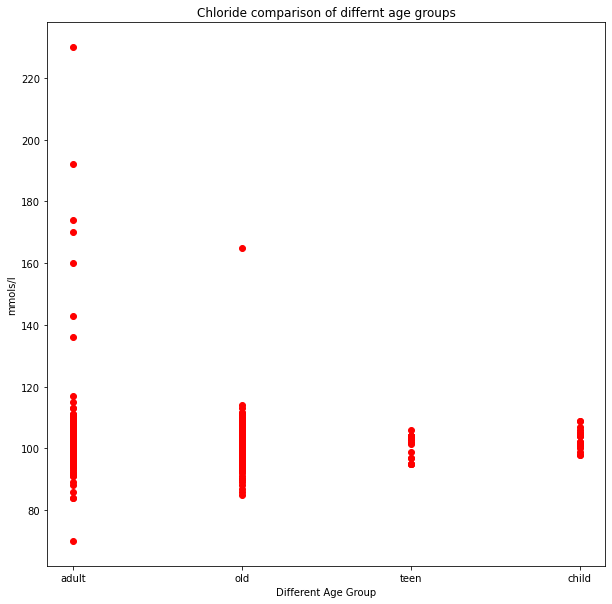

In [30]:
#Plotting the graph
plt.figure(figsize=(10,10))
plt.scatter(chloride_df['age_group'], chloride_df['parameter_value'], c='r', cmap='viridis' )
plt.xlabel("Different Age Group")
plt.ylabel("mmols/l")
plt.title("Chloride comparison of differnt age groups")
plt.show()